In [ ]:
""" HW1:

If one wish to run the codes, please download all the files from the folder DataFile,
Since they are needed to execute the codes.

Note:

1. For Question 11, I used two methods: method 1 is using for-loops to generate the TDM, and the second one is to use CountVectoriser.
It is observed that the CountVectorizer method has so many advantages:
   a). CountVectorizer consumes less time;
   b). CountVectorizer does not take in special characters while the mannual approach can hardly take out the special characters.
   c). The mannual approach needs the input of the number of top bigrams allowed, otherwise it will take in all bigrams.

However, since I could not figure out the in-depth way for CountVectorizer, I found it is confusing from the out put. 
When I mannually generate the TDM, I iterate through every document, and it was very easy to track which document has what tokens.
When it comes to the CountVectorizer, the TDM seems to be different than what I think it should be: while the shape is expected, 
the actual cell values for some of the document did not meet my expectation. Since the shape is correct, I will leave it like this
for now and count on my mannual TDM generation. 


2. For Question 11, the for-loops are using csv-writers, so that when the TDMs are generatedd, they will be stored as csv automatically.

3. Based on the above, it will take time and space to run the first method, it is highly recommended if you could please just 
expand out the output windows that were closed up for styling. 

4. Pickling are used, however based on the above that some TDMs are already be stored as csv, 
so I only used pickling techniques for the second methods.

5. I failed to use JSON for DictVectorizer. However, I imported JSON and read in the data to demonstrate my effort.

6. For the sake of time consumption and storage consumption, I downsized the twitter collections and the google search collections
to 1000 and 30 respectively. 

7. Again, it is highly recommended that one just expand the output cells to check what the results are look like to save time and space. 

"""

In [18]:
import pandas as pd
import numpy as np

import bs4
import tweepy
from urllib import request
import urllib
from urllib.request import urlopen
import re

import os
import sys

import nltk
from nltk import word_tokenize, pos_tag, sent_tokenize
from nltk.collocations import *

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.externals import joblib
from sklearn import datasets, svm, metrics

import csv

from collections import Counter

In [13]:
'urllib' in sys.modules

True

In [2]:
'numpy' in sys.modules

True

In [4]:
'sklearn' in sys.modules

True

In [5]:
'matplotlib' in sys.modules

True

In [16]:
'pymysql' in sys.modules

True

In [6]:
'bs4' in sys.modules

True

In [9]:
'tweepy' in sys.modules

True

In [13]:
'''Question 3). a. Description:

This block of the codes is reading in the standard datasets that are already in the sklearn, specifically 'iris' and 'digits'. 
And then it print/output the features and the corresponding data. 

'''

from sklearn import datasets #Importing sklearn package and dataset module.

iris = datasets.load_iris() #Loading dataset from the pre-defined "iris" dataset.
digits = datasets.load_digits() #Loading dataset from the pre-defined "load" dataset.

print(digits.data) #Printing the data from the dataset "digit" using ".data".
print()

digits.target #Outputting the corresponding variables from "digit"dataset, but different from print(digits.target), since it did not print the results out. 

digits.images[0] #Outputting the data array for the first image (image[0]). Noted that this image have 8 samples and 8 features. 


[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]



array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [6]:
'''Question 3). b. Description - 1:

This block of codes is to run a Support Vector Classification on iris dataset. 

'''

from sklearn import svm
from sklearn import datasets

clf = svm.SVC() # This is initializing the svm Support Vector Classification function. 
iris = datasets.load_iris() # Loading iris features.
X, y = iris.data, iris.target # Setting X as iris features, y as the iris corresponding data. 
clf.fit(X, y)  # Running the classification svm.SVC() for iris features and iris corresponding data.


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
'''Question 3). b. Description - 2:

This block of codes is showing how a model can be saved/serialized with pickle package. 

'''

import pickle

s = pickle.dumps(clf) # Dumping the SVC built before, aka 'clf', into the pickle function.
clf2 = pickle.loads(s) # Reading the pickled SVC built before as 'clf2'.
clf2.predict(X[0:1]) # Asking the SVC, aka 'clf2', to classify the corresponding flaura based on the features extracted from the first iris instance.

print(clf2.predict(X[0:1])) # Printing out.
print()

print(y[0]) # This is the print of the original first corresponding iris data. 

[0]

0


In [15]:
'''Question 3). b. Description - 3:

This block is showing another way of saving models. 

'''

from sklearn.externals import joblib

joblib.dump(clf, 'filename.pkl') # Dumping the model SVC 'clf' into 'filename.pkl'.

clf = joblib.load('filename.pkl') # Reading in the model 'clf' back from the file.

print(clf.predict(X[0:1])) # Asking the SVC, aka 'clf', to classify the corresponding flaura based on the features extracted from the first iris instance.


[0]


 4). Description:

Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
License: BSD 3 clause





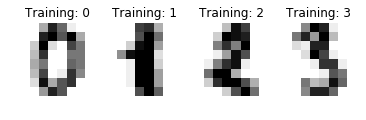

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1 

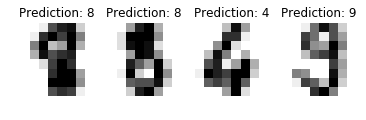

In [18]:
''' Question 4). Description:

Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
License: BSD 3 clause


'''

print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets, svm, metrics

digits = datasets.load_digits() # Importing standard built-in dataset of 'digits'.

images_and_labels = list(zip(digits.images, digits.target)) #Explannation:
# 1. digits.image and digits.target: these are extracting plots and corresponding variables from the 'digits';
# 2. zip: this is to make the elements in lists corresponding to each other one by one, and the new list is iterable. 
# 3. image_and_labels: this is the list with the iterables.

# This block of codes below is printing out the first 4 images with titles in a single plot:
for index, (image, label) in enumerate(images_and_labels[:4]): # Building up a for loop to iterate through index 0 to 4, with the image and label iterating through the zip.
    plt.subplot(2, 4, index + 1) # Setting the plot position for each iteration, in a 2 by 4 plot. 
    plt.axis('off') # Turning off the axises. 
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest') # Showing every image from the zip for the loop, and colors follow cmap setting, and ignoring the interpolation between pixels if the display resolution is not the same as the image resolution.
    plt.title('Training: %i' % label) # Print title for each image with the according label in the zip. 

plt.show() #show the plot created above.

n_samples = len(digits.images) # Setting number of samples, aka n_samples, as the length of the images dataset. 
data = digits.images.reshape((n_samples, -1)) # Reshaping the image dataset to pile up all the features.

classifier = svm.SVC(gamma=0.001) # Creating a Support Vector Classifier.

classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2]) # Feeding the svm.SVC(gamma=0.001), aka Classifier, with the first half of the reshaped digits.images, aka the data. 

# The following block could be treated as this is the testing data:
expected = digits.target[n_samples // 2:] # Setting the output of the expected testing data (true data) as the second half of the digits.target.
predicted = classifier.predict(data[n_samples // 2:]) # Applying the trained classifier to the second half of the reshaped digits.images, aka the data.

# The following block is printing out the classifier's performance:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted))) # Printing the classifier report metricts, where 'expected' is the true data and 'predicted' is the prediction data. 
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted)) # Printing confusion matrix to evaluate the accuracy of the classifier.

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted)) # Similarly to the first zip, this one is zipping together the second half digits.image and the predicted after the classifier. 

# Similarly to the previous one, this block of codes below is printing out the first 4 images with titles in a single plot:
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show() # Showing the plot. 

In [4]:
''' Question 5) Description:

Instead of using the shuffle methods in class tutorial, I used random.shuffle():

'''

# Import the Iris dataset into 'iris_data'.
iris_data = datasets.load_iris()

""" Task 1:

The iris dataset is using 4 features: sepal lengthy/width and petal length/width to predict 3 categories of flowers: 
Setosa, Versicolor, and Virginica

"""
trial_data = iris_data.data
trial_feature = iris_data.target

# return the shape of the data
print ("The shape of the data before inserting one column is:")
print (trial_data.shape)

trial_data_inserted= np.insert(trial_data, trial_data.shape[1], trial_feature,axis=1)

"""print ("The shape of the data after inserting one column is:")
print (trial_data_inserted.shape)

print ("The one column inserted is:")
print (trial_data_inserted[:,trial_data_inserted.shape[1]-1])
"""
# Block 2: Shuffle the data
""" Noted the shuffling of the data is important:

Say if we always want to use the first 100 data, then we need to shuffle the data otherwise we can only get the 100 as the sample
everytime. 

"""

np.random.shuffle(trial_data_inserted)
df = pd.DataFrame(trial_data_inserted)

features = df[df.columns[0:4]]
target = df[df.columns[4]]

# Block 3: Create a new classifier, define training set, fit the classifier.

classifier = svm.SVC(gamma=0.001)
classifier.fit(features[:125], target[:125])

# The test data.
test_data = features[125:]
Y_true = target[125:]

# The predicted Y data.
Y_predicted = classifier.predict(test_data)

"""
sklearn.metrics.classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
"""

# Print the metrics report.
print("Classification report for classifier %s\n%s\n" % (classifier, metrics.classification_report(Y_true, Y_predicted)))

# Print out the confusion matrix.
print("Confusion Matrix:\n%s" % metrics.confusion_matrix(Y_true, Y_predicted))

The shape of the data before inserting one column is:
(150, 4)
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00         7
        1.0       0.28      1.00      0.43         5
        2.0       0.00      0.00      0.00        13

avg / total       0.34      0.48      0.37        25


Confusion Matrix:
[[ 7  0  0]
 [ 0  5  0]
 [ 0 13  0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
""" Question 5)Task 3:

"""

size = 100

training_indexes = ref_indexes[:size]
#print (iris_data.data[training_indexes])
print ("The training size is " + str(len(training_indexes)))

classifier.fit(iris_data.data[training_indexes], iris_data.target[training_indexes])

The training size is 100


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
''' Question 6). Description:

Step 1: import bostion data, and dump the boston housing data into a pkl.

'''

from sklearn.externals import joblib

house = datasets.load_boston()

joblib.dump(house, 'BostonHousing.pkl') # Dumping the Boston Housing Data into 'BostonHousing.pkl'.

data = house.data
print(data.shape)
print()

price = house.target
print(price.shape)
print()

print(house.DESCR)

(506, 13)

(506,)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher r

In [76]:
import pandas as pd

df = pd.DataFrame(data)

df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [77]:
""" Question 6). Description:

Step 2: For each feature that are numerical, calculate the means, medians, and modes. 

"""

for n in range(0,13):
    if n != 3:
        print("Mean for the Feature {} - {}".format(n+1, df[n].mean()))
        print("Median - {}".format(df[n].median()))
        print()
    else:
        print("Mode for the Feature {} - {}".format(n+1, df[n].mode().values))
        print()


Mean for the Feature 1 - 3.593760711462451
Median - 0.25651

Mean for the Feature 2 - 11.363636363636363
Median - 0.0

Mean for the Feature 3 - 11.136778656126504
Median - 9.69

Mode for the Feature 4 - [ 0.]

Mean for the Feature 5 - 0.5546950592885372
Median - 0.538

Mean for the Feature 6 - 6.284634387351787
Median - 6.2085

Mean for the Feature 7 - 68.57490118577078
Median - 77.5

Mean for the Feature 8 - 3.795042687747034
Median - 3.2074499999999997

Mean for the Feature 9 - 9.549407114624506
Median - 5.0

Mean for the Feature 10 - 408.2371541501976
Median - 330.0

Mean for the Feature 11 - 18.455533596837967
Median - 19.05

Mean for the Feature 12 - 356.67403162055257
Median - 391.44

Mean for the Feature 13 - 12.653063241106723
Median - 11.36



In [47]:
''' Question 7). Description:

1. First read in the dat with read_csv, and in the meantime, write the names for the columns.


'''

import pandas as pd

# a. First, use the read_csv function in pandas to load the data into a dataframe
df=pd.read_csv('airports.dat', names = ["ID", "Name", "City", "Country", "IATA", "ICAO", "Lat", "Long", "Alt", "tz", "DST", "TZData", "Type", "Source"])
#df=pd.read_csv('airports.dat')

# b. Next, use the to_dict function to save the data as a dictionary (HINT: transpose the data and make sure to only keep the values)
print(df.head(7))

# c. Use the sklearn DictVectorizer to load the data

print(df.shape)

   ID                                         Name          City  \
0   1                               Goroka Airport        Goroka   
1   2                               Madang Airport        Madang   
2   3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3   4                               Nadzab Airport        Nadzab   
4   5  Port Moresby Jacksons International Airport  Port Moresby   
5   6                  Wewak International Airport         Wewak   
6   7                           Narsarsuaq Airport  Narssarssuaq   

            Country IATA  ICAO        Lat        Long   Alt  tz DST  \
0  Papua New Guinea  GKA  AYGA  -6.081690  145.391998  5282  10   U   
1  Papua New Guinea  MAG  AYMD  -5.207080  145.789001    20  10   U   
2  Papua New Guinea  HGU  AYMH  -5.826790  144.296005  5388  10   U   
3  Papua New Guinea  LAE  AYNZ  -6.569803  146.725977   239  10   U   
4  Papua New Guinea  POM  AYPY  -9.443380  147.220001   146  10   U   
5  Papua New Guinea  WWK  AYW

In [142]:
""" Question 7):

2. Dropped the cateforical/string type of data, for further calculation of descriptive statistics. 

"""

drop = ["ID", "Name", "City", "Country", "IATA", "ICAO", "DST", "TZData", "Type", "Source"]

for ele in drop:
    df.drop([ele], axis=1, inplace = True)
    
df.head(7)

,Lat,Long,Alt,tz
0,-6.081690,145.391998,5282,10
1,-5.207080,145.789001,20,10
2,-5.826790,144.296005,5388,10
3,-6.569803,146.725977,239,10
4,-9.443380,147.220001,146,10
5,-3.583830,143.669006,19,10
6,61.160500,-45.425999,112,-3


In [143]:
""" Question 7):

3. Use the describe function for the descriptive statistics.

"""

df.describe()

,Lat,Long,Alt
count,7184.000000,7184.000000,7184.000000
mean,25.950874,-2.946702,1011.833101
std,28.239954,85.993653,1608.349308
min,-90.000000,-179.876999,-1266.000000
25%,7.366353,-79.467924,66.000000
50%,34.262400,5.820455,354.000000
75%,47.290104,50.838224,1197.250000
max,82.517799,179.951004,14219.000000


In [173]:
""" Question 7):

4. I did NOT transpose it, however I used the kwa for orient = 'indext', so it would do the same work as I transpose it then write into a dictionary. 

"""
Dict = df.to_dict(orient='indext')
D = Dict.values()

print(D)

dict_values([{'ID': 1, 'Name': 'Goroka Airport', 'City': 'Goroka', 'Country': 'Papua New Guinea', 'IATA': 'GKA', 'ICAO': 'AYGA', 'Lat': -6.0816898345900015, 'Long': 145.391998291, 'Alt': 5282, 'tz': '10', 'DST': 'U', 'TZData': 'Pacific/Port_Moresby', 'Type': 'airport', 'Source': 'OurAirports'}, {'ID': 2, 'Name': 'Madang Airport', 'City': 'Madang', 'Country': 'Papua New Guinea', 'IATA': 'MAG', 'ICAO': 'AYMD', 'Lat': -5.20707988739, 'Long': 145.789001465, 'Alt': 20, 'tz': '10', 'DST': 'U', 'TZData': 'Pacific/Port_Moresby', 'Type': 'airport', 'Source': 'OurAirports'}, {'ID': 3, 'Name': 'Mount Hagen Kagamuga Airport', 'City': 'Mount Hagen', 'Country': 'Papua New Guinea', 'IATA': 'HGU', 'ICAO': 'AYMH', 'Lat': -5.826789855957031, 'Long': 144.29600524902344, 'Alt': 5388, 'tz': '10', 'DST': 'U', 'TZData': 'Pacific/Port_Moresby', 'Type': 'airport', 'Source': 'OurAirports'}, {'ID': 4, 'Name': 'Nadzab Airport', 'City': 'Nadzab', 'Country': 'Papua New Guinea', 'IATA': 'LAE', 'ICAO': 'AYNZ', 'Lat':

In [108]:
""" Question 7):

5. I am doing the vectorization so that I do not need to worry about categorical problems. 

"""
v = DictVectorizer(sparse=False)
X = v.fit_transform(D)
X

array([[  5.28200000e+03,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.00000000e+01,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  5.38800000e+03,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [109]:
""" Question 7):

5. Pickling 

"""

joblib.dump(X, 'DictVectorized.pkl') # Dumping the Boston Housing Data into 'DictVectorized.pkl'.

['DictVectorized.pkl']

In [111]:
num_cols = df._get_numeric_data().columns
print(num_cols)

Index(['ID', 'Lat', 'Long', 'Alt'], dtype='object')


In [72]:
""" Question 7):

6. Calculating levels for categorical columns. 

"""

Category = ["Country", "IATA", "ICAO", "tz", "DST", "TZData", "Type", "Source"]

# Number of levels:
for cat in Category:
    lst = list(df[cat])
    num = len(set(lst))
    print("Level for Category {} is {}".format(cat, num))

# Modes:
for cat in Category:
    mode = df[cat].mode()
    print("Mode for Category {} is {}".format(cat, mode.values))

Level for Category Country is 237
Level for Category IATA is 5654
Level for Category ICAO is 7184
Level for Category tz is 39
Level for Category DST is 8
Level for Category TZData is 308
Level for Category Type is 1
Level for Category Source is 1
Mode for Category Country is ['United States']
Mode for Category IATA is ['\\N']
Mode for Category ICAO is ['03N' '07FA' '07MT' ..., 'ZYYJ' 'ZYYK' 'ZYYY']
Mode for Category tz is ['1']
Mode for Category DST is ['U']
Mode for Category TZData is ['\\N']
Mode for Category Type is ['airport']
Mode for Category Source is ['OurAirports']


In [123]:
""" Question 7):

7. Calculating means and medians for numerical columns. 

"""

numlist = ['ID', 'Lat', 'Long', 'Alt']

for num in numlist:
    mean = df[num].mean
    print("Mean for {} is {}".format(num, mean))
    median = df[num].median
    print("Mean for {} is {}".format(num, median))
    print()

Mean for ID is <bound method Series.mean of 0           1
1           2
2           3
3           4
4           5
5           6
6           7
7           8
8           9
9          10
10         11
11         12
12         13
13         14
14         15
15         16
16         17
17         18
18         19
19         20
20         21
21         22
22         23
23         24
24         25
25         26
26         27
27         28
28         29
29         30
        ...  
7154    12028
7155    12029
7156    12030
7157    12031
7158    12032
7159    12033
7160    12034
7161    12035
7162    12036
7163    12037
7164    12038
7165    12039
7166    12040
7167    12041
7168    12042
7169    12043
7170    12044
7171    12045
7172    12046
7173    12047
7174    12048
7175    12049
7176    12050
7177    12051
7178    12052
7179    12053
7180    12054
7181    12055
7182    12056
7183    12057
Name: ID, Length: 7184, dtype: int64>
Mean for ID is <bound method Series.median of 0           1
1   

In [144]:
""" Question 8):

1. Importing the csv, I chose 2010_Census_Populations_by_Zip_Code. 

"""

# a. First, use the read_csv function in pandas to load the data into a dataframe
df=pd.read_csv('2010_Census_Populations_by_Zip_Code.csv')

df.head(7)


,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73
5,90005,37681,33.9,19299,18382,15044,2.50
6,90006,59185,32.4,30254,28931,18617,3.13


In [145]:
df.describe()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,91000.673981,33241.341693,36.527586,16391.564263,16849.777429,10964.570533,2.828119
std,908.360203,21644.417455,8.692999,10747.495566,10934.986468,6270.646400,0.835658
min,90001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90243.500000,19318.500000,32.400000,9763.500000,9633.500000,6765.500000,2.435000
50%,90807.000000,31481.000000,37.100000,15283.000000,16202.000000,10968.000000,2.830000
75%,91417.000000,44978.000000,41.000000,22219.500000,22690.500000,14889.500000,3.320000
max,93591.000000,105549.000000,74.000000,52794.000000,53185.000000,31087.000000,4.670000


In [137]:
""" Question 8):

2. Vectorization. 

"""

print(df.shape)

Dict = df.to_dict(orient='indext')
D = Dict.values()

v = DictVectorizer(sparse=False)
X = v.fit_transform(D)
X

(319, 7)


array([[  1.00000000e+00,   7.35000000e+01,   1.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   9.13710000e+04],
       [  4.40000000e+00,   2.66000000e+01,   2.86420000e+04, ...,
          2.84680000e+04,   5.71100000e+04,   9.00010000e+04],
       [  4.36000000e+00,   2.55000000e+01,   2.63470000e+04, ...,
          2.48760000e+04,   5.12230000e+04,   9.00020000e+04],
       ..., 
       [  2.92000000e+00,   3.24000000e+01,   9.41900000e+03, ...,
          9.49100000e+03,   1.89100000e+04,   9.35600000e+04],
       [  2.53000000e+00,   4.45000000e+01,   1.25000000e+02, ...,
          2.63000000e+02,   3.88000000e+02,   9.35630000e+04],
       [  3.67000000e+00,   3.09000000e+01,   3.63200000e+03, ...,
          3.65300000e+03,   7.28500000e+03,   9.35910000e+04]])

In [133]:
""" Question 8):

3. Pickling 

"""

joblib.dump(df, 'CensusVectorized.pkl') # Pickling.

['CensusVectorized.pkl']

In [13]:
""" Question 9):

1. Import json file

"""

import json

df = pd.read_json('rows.json', typ = 'series', orient = 'index')

print(df) # Noted that this is a dictionary inside a dictionary. 

data    [[1, 19694115-AF6A-4DCC-9532-C3C48B50ECF9, 1, ...
meta    {'view': {'id': 'g4ie-h725', 'name': 'U.S. Chr...
dtype: object


In [17]:
print(df.values)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [163]:
print(df['meta'])

{'view': {'id': 'g4ie-h725', 'name': 'U.S. Chronic Disease Indicators (CDI)', 'attribution': 'Centers for Disease Control and Prevention, National Center for Chronic Disease Prevention and Health Promotion, Division of Population Health', 'attributionLink': 'http://www.cdc.gov/nccdphp/dph/', 'averageRating': 0, 'category': 'Chronic Disease Indicators', 'createdAt': 1463517008, 'description': "CDC's Division of Population Health provides cross-cutting set of 124 indicators that were developed by consensus and that allows states and territories and large metropolitan areas to uniformly define, collect, and report chronic disease data that are important to public health practice and available for states, territories and large metropolitan areas. In addition to providing access to state-specific indicator data, the CDI web site serves as a gateway to additional information and data resources.", 'displayType': 'table', 'downloadCount': 60998, 'hideFromCatalog': False, 'hideFromDataJson': Fa

In [ ]:
joblib.dump(df, 'disease.pkl') # Pickling.

df = joblib.load('disease.pkl')

In [182]:
print(df['meta'].values())

dict_values([{'id': 'g4ie-h725', 'name': 'U.S. Chronic Disease Indicators (CDI)', 'attribution': 'Centers for Disease Control and Prevention, National Center for Chronic Disease Prevention and Health Promotion, Division of Population Health', 'attributionLink': 'http://www.cdc.gov/nccdphp/dph/', 'averageRating': 0, 'category': 'Chronic Disease Indicators', 'createdAt': 1463517008, 'description': "CDC's Division of Population Health provides cross-cutting set of 124 indicators that were developed by consensus and that allows states and territories and large metropolitan areas to uniformly define, collect, and report chronic disease data that are important to public health practice and available for states, territories and large metropolitan areas. In addition to providing access to state-specific indicator data, the CDI web site serves as a gateway to additional information and data resources.", 'displayType': 'table', 'downloadCount': 60998, 'hideFromCatalog': False, 'hideFromDataJson'

In [ ]:
"""
Failed.
"""

v = DictVectorizer(sparse=False)
X = v.fit_transform(D)
X

In [ ]:
""" Question 11): Section 0:

Notes:

This is a python file dedicated for Question 11. 

I used two methods for this question:

Method one: Mannualy generate TDM:
  a). I first created a class called RawText();
  b). For each task:
    1) I created a raw list, each element in the list is a document (a paragraph, a tweet, a article, a speaker's note, a carriage return, a web text)
    2) The RawText function of generating a Term-Document Matrix (tdm) is to loop through each element in the raw list, and write rows in the csv.


Method two: Use CountVectorizer()
  Read in lists that already been separated into several documents.
"""

In [20]:
""" Question 11): Section 1: Method 1: Mannually generation for TDM

Class Definition and functions: RawText

1). attribute RawText.raw;

2). function RawText.TopBigrams(top_num = 30), which allows users to input how many bigrams should be returned, and the default is 30;
3). function RawText.tdm_bi(top_num, name), which allows users to specify the number of bigrams allowed in the matrix and the name of the new csv file to be saved. 
4). function RawText.tdm_uni(name), which allows usres to specify the name of the csv file to be saved. 

"""

class RawText(): 
    tokens = []
    
    def __init__(self, raw): 
        self.inst_attr = "Raw Text" 
        self.raw = raw
    
    def __repr__(self):
        return(print("Type: {}".format(type(self.raw))))

    # Find the top bigrams for the whole text, other than for each document, since document could be as short as 1 word:
    def TopBigrams(self, top_num = 30):
        tokens = []
        
        # First, loop through each document, and tokenize them all:
        for doc in self.raw:
            token = nltk.word_tokenize(doc)
            # Create a list of token, and loop through every document to creat a list for the whole text.
            tokens.extend(token)
        
        
        bigram_measures = nltk.collocations.BigramAssocMeasures()
        
        # Find bigrams in the list of tokens from the whole text.
        finder = BigramCollocationFinder.from_words(tokens)
        
        # finder.nbest: find the top bigrams based on the bigrams.scores, number of bigrams returned is defined by user in top_num.
        bigrams = finder.nbest(bigram_measures.pmi, top_num)

        # To list all bigrams and tokens, with their counts associated.
        bigramsC = Counter(bigrams)
        tokensC = Counter(tokens)
        counter_sum = bigramsC + tokensC
        
        print("Top {} bigrams: \n{}".format(top_num, bigrams))
    
    # Generating a Term-Document Matrix (tdm): loop through each element in the raw list, and write rows in the csv.
    def tdm_bi(self, top_num, name):
        tokens = []
        for doc in self.raw:
            token = nltk.word_tokenize(doc)
            tokens.extend(token)
            
        bigram_measures = nltk.collocations.BigramAssocMeasures()
        finder = BigramCollocationFinder.from_words(tokens)
        
        # finder.nbest: find the top bigrams based on the bigrams.scores, number of bigrams returned is defined by user in top_num.
        bigrams = finder.nbest(bigram_measures.pmi, top_num)

        # Generate Counter class, to list all bigrams and tokens with their counts associated.
        bigramsC = Counter(bigrams)
        tokensC = Counter(tokens)
        counter_sum = bigramsC + tokensC
        
        # Write new csv, that will allow users to define names:
        with open('{}.csv'.format(name), 'w', newline='', encoding = 'utf-8') as csvfile:
            header = sorted(counter_sum, key=lambda x: str(type(x)))
            writer = csv.DictWriter(csvfile, fieldnames=header)
            writer.writeheader()
            
            for doc in self.raw:
                token = nltk.word_tokenize(doc)
                tokens.extend(token)
                tokensC = Counter(token)
                bigramsC = Counter(bigrams)
                both_counters = bigramsC + tokensC
                
                # Read in Counter classes as dictionaries, so that I could extract the values and keys.
                cs = dict(counter_sum)
                bc = dict(both_counters)
                
                # Write rows: this is inside the for-loop of one document (for doc in self.raw), so each row will be representing one document.
                row = {}
                for element in list(cs):
                    # Write in values for cells, which are the count for each token in the document. 
                    if element in list(bc):
                        row[element] = bc[element]
                    # If tokens are not in the list, aka they did not appear in the document, then the cell is writing in 0.
                    else:
                        row[element] = 0
                writer.writerow(row)
            
            print("CSV ({}) created successfully.".format(name))
        
        
        
    def tdm_uni(self, name): 
        tokens = []
        for doc in self.raw:
            token = nltk.word_tokenize(doc)
            tokens.extend(token)
            
        tokensC_all = Counter(tokens)
        
        with open('{}.csv'.format(name), 'w', newline='', encoding = 'utf-8') as csvfile:
            header = sorted(tokensC_all, key=lambda x: str(type(x)))
            writer = csv.DictWriter(csvfile, fieldnames=header)
            writer.writeheader()
            for doc in self.raw:
                token = nltk.word_tokenize(doc)
                tokens.extend(token)
                tokensC = Counter(token)
                tC = dict(tokensC_all)
                tC_all = dict(tokensC)
                row = {}
                for element in list(tC):
                    if element in list(tC_all):
                        row[element] = tC_all[element]
                    else:
                        row[element] = 0
                writer.writerow(row)
                
            print("CSV ({}) created successfully.".format(name))

In [21]:
""" Question 11): Section 1: Method 2: Generation for TDM with CountVectorization

Class Definition and functions: RawText_2

1). attribute RawText_2.raw;

2). function RawText.TopBigrams(top_num = 30), which allows users to input how many bigrams should be returned, and the default is 30;
3). function RawText.tdm_bi(top_num, name), which allows users to specify the number of bigrams allowed in the matrix and the name of the new csv file to be saved. 
4). function RawText.tdm_uni(name), which allows usres to specify the name of the csv file to be saved. 

"""

class RawText_2(): 
    tokens = []
    
    def __init__(self, raw): 
        self.inst_attr = "Raw Text" 
        self.raw = raw
    
    def __repr__(self):
        return(print("Type: {}".format(type(self.raw))))

    # Find the top bigrams for the whole text, other than for each document, since document could be as short as 1 word:
    def TopBigrams(self, top_num = 30):
        tokens = []
        
        # First, loop through each document, and tokenize them all:
        for doc in self.raw:
            token = nltk.word_tokenize(doc)
            # Create a list of token, and loop through every document to creat a list for the whole text.
            tokens.extend(token)
        
        
        bigram_measures = nltk.collocations.BigramAssocMeasures()
        
        # Find bigrams in the list of tokens from the whole text.
        finder = BigramCollocationFinder.from_words(tokens)
        
        # finder.nbest: find the top bigrams based on the bigrams.scores, number of bigrams returned is defined by user in top_num.
        bigrams = finder.nbest(bigram_measures.pmi, top_num)
        
        print("Top {} bigrams: \n{}".format(top_num, bigrams))
    
    # Generating a Term-Document Matrix (tdm): loop through each element in the raw list, and write rows in the csv.
    def TDM(self, uni_or_bi):
        counter = CountVectorizer(ngram_range=(1, uni_or_bi))

        M = counter.fit_transform(self.raw)
        V = counter.vocabulary_

        self.df = pd.DataFrame(M.toarray(), columns = V.keys())

        print("The Shape of the Matrix with the maximum n-gram of {} is: {}".format(uni_or_bi, df.shape))
        print("Top 7 rows for the TDM:\n")
        print(self.df[:20])


In [22]:
""" Class RawText 1 for Method 1: George Washington’s Masonic Correspondence  

One document is denoted as one paragraph. 

Noted when checking the raw text, '\r\n\r\n' separated one paragraph. 

The accuracy could be check in the HW word document, where a screenshot is shown how the separation of paragraphs in the code is in line with the original text.

"""

url = "http://www.gutenberg.org/cache/epub/29949/pg29949.txt"
response = request.urlopen(url)
raw_29949 = response.read().decode('utf8')

raw = re.split('\r\n\r\n', raw_29949)

raw_1 = RawText(raw)

# Printing out the top bigrams of chosen number: 40
raw_1.TopBigrams(40)

# TDM-Only unigrams and pickling:
raw_1.tdm_uni('29949_tdm_uni') 
print()
#joblib.dump(raw_1.tdm, 'tdm_uni_29949.pkl')

# TDM-Allowing bigrams and pickling:
raw_1.tdm_bi(40,'29949_tdm_bi') 
print()
#joblib.dump(raw_1.tdm, 'tdm_bi_29949.pkl')

Top 40 bigrams: 
[('#', '29949'), ("'to", 'overturn'), ('130-131', 'FOREWORD'), ('141', 'ILLUSTRATIONS'), ('1788-1793.=', 'EXTRACT'), ('4557', 'Melan'), ('=GENERAL', 'MORDECAI'), ('=_The', 'Arms'), ('AGREEMENT', 'WILL'), ('ANTOINE', 'HOUDON'), ('Accepts', 'Honorary'), ('Ahiman', 'Rezon'), ('Almighty', 'disposer'), ('Anno', 'Domini'), ('Any', 'alternate'), ('BALTHAZAR', 'FEVERET'), ('BE', 'LIABLE'), ('Brs', 'Sadler'), ('CHARLES', 'BALTHAZAR'), ('COHEN', '_Prince'), ('COLOR', 'PAINTING'), ('CONGRESS', 'Compiled'), ('CONTEMPORARY', 'WATER'), ('CONTRACT', 'EXCEPT'), ('Charles', 'H.'), ('Christmas', 'Eve'), ('DE', 'SAINT'), ('DISTRIBUTOR', 'UNDER'), ('Devoted', 'friends'), ('Director', 'gbnewby'), ('ERA', 'PRINTING'), ('EVEN', 'IF'), ('Eleventh', 'amendment'), ('Et', 'Justica'), ('Europe', 'admire'), ('Everlasting', 'Rest'), ('Every', 'circumstance'), ('FEVERET', 'DE'), ('FIGURES', 'ARE'), ('FOUND', 'AMONG')]
CSV (29949_tdm_uni) created successfully.

CSV (29949_tdm_bi) created successfully

In [24]:
""" Class RawText 1 for Method 2: George Washington’s Masonic Correspondence  


"""
raw_1_2 = RawText_2(raw)

# Printing out the top bigrams of chosen number: 40
raw_1_2.TopBigrams(40)

# TDM-Only unigrams and pickling:
raw_1_2.TDM(1) 
print()
#joblib.dump(raw_1.tdm, 'tdm_uni_29949.pkl')

# TDM-Allowing bigrams and pickling:
raw_1_2.TDM(2) 
print()

Top 40 bigrams: 
[('#', '29949'), ("'to", 'overturn'), ('130-131', 'FOREWORD'), ('141', 'ILLUSTRATIONS'), ('1788-1793.=', 'EXTRACT'), ('4557', 'Melan'), ('=GENERAL', 'MORDECAI'), ('=_The', 'Arms'), ('AGREEMENT', 'WILL'), ('ANTOINE', 'HOUDON'), ('Accepts', 'Honorary'), ('Ahiman', 'Rezon'), ('Almighty', 'disposer'), ('Anno', 'Domini'), ('Any', 'alternate'), ('BALTHAZAR', 'FEVERET'), ('BE', 'LIABLE'), ('Brs', 'Sadler'), ('CHARLES', 'BALTHAZAR'), ('COHEN', '_Prince'), ('COLOR', 'PAINTING'), ('CONGRESS', 'Compiled'), ('CONTEMPORARY', 'WATER'), ('CONTRACT', 'EXCEPT'), ('Charles', 'H.'), ('Christmas', 'Eve'), ('DE', 'SAINT'), ('DISTRIBUTOR', 'UNDER'), ('Devoted', 'friends'), ('Director', 'gbnewby'), ('ERA', 'PRINTING'), ('EVEN', 'IF'), ('Eleventh', 'amendment'), ('Et', 'Justica'), ('Europe', 'admire'), ('Everlasting', 'Rest'), ('Every', 'circumstance'), ('FEVERET', 'DE'), ('FIGURES', 'ARE'), ('FOUND', 'AMONG')]
The Shape of the Matrix with the maximum n-gram of 1 is: (2,)
Top 7 rows for the T

In [40]:
""" Picklinig:

This is only pickling for unigrams, but the process for pickling the uni+bigrams should be the same.

"""
raw_1_2.TDM(1) 

joblib.dump(raw_1_2.df, '29949_2.pkl')
raw_1_2 = joblib.load('29949_2.pkl') 

print(raw_1_2.head(7)) 

The Shape of the Matrix with the maximum n-gram of 1 is: (33137, 21)
Top 7 rows for the TDM:

    project  gutenberg  washington  masonic  correspondence  by  julius  \
0         0          0           0        0               0   0       0   
1         0          0           0        0               0   0       0   
2         0          0           0        0               0   0       0   
3         0          0           0        0               0   0       0   
4         0          1           0        0               0   0       0   
5         0          0           0        0               0   0       0   
6         0          0           0        0               0   0       0   
7         0          0           0        0               0   0       0   
8         0          0           0        0               0   0       0   
9         0          0           0        0               0   0       0   
10        0          0           0        0               0   0       0   
11    

In [25]:
""" Class RawText 2 for Method 1: FDA Circulatory System’s Devices Panel Advisory Panel Meeting of January 13, 2005

Split the text based on each speaker's notes:

Noted that some notes from speakers would be documented in more than one paragraph, however when a new speaker starts to talk, it is always denoted as Dr./Mr./Ms, all in capital letters.
Thus, the split of the text is using package re.split(), with a denotion of "\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 \DR|MS|MR".

The accuracy of this separation could be checked as demonstrated in a screenshot in HW word document. 

"""
from bs4 import BeautifulSoup

url = "https://www.fda.gov/ohrms/dockets/ac/05/transcripts/2005-4149t2.htm"
html = request.urlopen(url).read()
print(html[:60])

raw_HTML = BeautifulSoup(html).get_text()

#print(raw_HTML)
# Get a list of raw text where one element in the list denotes one document.
raw = re.split('\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 \DR|MS|MR', raw_HTML)

# Define a RawText class:
raw_2 = RawText(raw)

# Printing out the top bigrams of chosen number: 40
raw_2.TopBigrams(40)

# TDM-Only unigrams and pickling:
raw_2.tdm_uni('fda_tdm_uni') 
print()
#joblib.dump(raw_1.tdm, 'tdm_uni_29949.pkl')

# TDM-Allowing bigrams and pickling:
raw_2.tdm_bi(40,'fda_tdm_bi') 
print()


b'<html xmlns:v="urn:schemas-microsoft-com:vml"\r\nxmlns:o="urn:'


C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Top 40 bigrams: 
[('113', 'PRIMARY'), ('17-month', 'journey'), ('184', 'CALL'), ('2000', 'ccs'), ('321', 'P-R-O-C-E-E-D-I-N-G-S'), ('39', 'year-old'), ('55th', 'wedding'), ('620', 'Perry'), ('8:00', 'a.m.'), ('8:12', 'a.m'), ('8th', 'grade'), ('<', '!'), ('A-F-T-E-R-N-O-O-N', 'S-E-S-S-I-O-N'), ('ADMINISTRATION', 'CENTER'), ('Application', 'H04006'), ('Arial', 'Narrow'), ('Ask', 'yourselves'), ('Association', 'Class'), ('Being', 'comatose'), ('Bilirubin', 'climbed'), ('CCRP', 'CONSUMER'), ('CENTER', 'FOR'), ('CHAIRPERSON', 'MITCHELL'), ('CHRISTOPHER', 'J'), ('CIRCULATORY', 'SYSTEM'), ('CLINICAL', 'ASPECTS'), ('Cardiomyopathy', 'Questionnaire'), ('Care', 'Policy'), ('Chairperson', 'Special'), ('Chief', 'Scientific'), ('Consumer', 'Rep'), ('Cynthia', 'Tracy'), ('DRUG', 'ADMINISTRATION'), ('Default', 'Paragraph'), ('EXECUTIVE', 'SECRETARY'), ('Eve', 'party'), ('Executive', 'Secretary'), ('Exemption', 'Application'), ('Failure', 'Cardiologist'), ("Frazier's", 'holding')]
CSV (fda_tdm_uni) c

In [26]:
""" Class RawText 2 for Method 2 

"""
raw_2_2 = RawText_2(raw)

# Printing out the top bigrams of chosen number: 40
raw_2_2.TopBigrams(40)

# TDM-Only unigrams and pickling:
raw_2_2.TDM(1) 
print()
#joblib.dump(raw_1.tdm, 'tdm_uni_29949.pkl')

# TDM-Allowing bigrams and pickling:
raw_2_2.TDM(2) 
print()


Top 40 bigrams: 
[('113', 'PRIMARY'), ('17-month', 'journey'), ('184', 'CALL'), ('2000', 'ccs'), ('321', 'P-R-O-C-E-E-D-I-N-G-S'), ('39', 'year-old'), ('55th', 'wedding'), ('620', 'Perry'), ('8:00', 'a.m.'), ('8:12', 'a.m'), ('8th', 'grade'), ('<', '!'), ('A-F-T-E-R-N-O-O-N', 'S-E-S-S-I-O-N'), ('ADMINISTRATION', 'CENTER'), ('Application', 'H04006'), ('Arial', 'Narrow'), ('Ask', 'yourselves'), ('Association', 'Class'), ('Being', 'comatose'), ('Bilirubin', 'climbed'), ('CCRP', 'CONSUMER'), ('CENTER', 'FOR'), ('CHAIRPERSON', 'MITCHELL'), ('CHRISTOPHER', 'J'), ('CIRCULATORY', 'SYSTEM'), ('CLINICAL', 'ASPECTS'), ('Cardiomyopathy', 'Questionnaire'), ('Care', 'Policy'), ('Chairperson', 'Special'), ('Chief', 'Scientific'), ('Consumer', 'Rep'), ('Cynthia', 'Tracy'), ('DRUG', 'ADMINISTRATION'), ('Default', 'Paragraph'), ('EXECUTIVE', 'SECRETARY'), ('Eve', 'party'), ('Executive', 'Secretary'), ('Exemption', 'Application'), ('Failure', 'Cardiologist'), ("Frazier's", 'holding')]
The Shape of the Ma

In [42]:
""" Picklinig:

This is only pickling for unigrams, but the process for pickling the uni+bigrams should be the same.

"""
raw_2_2.TDM(1) 

joblib.dump(raw_2_2.df, 'html_2.pkl')
raw_2_2 = joblib.load('html_2.pkl') 

print(raw_2_2.head(7)) 

The Shape of the Matrix with the maximum n-gram of 1 is: (33137, 21)
Top 7 rows for the TDM:

    united  states  of  america  font  definitions  face  family  courier  \
0        1       0  20        0     0            0   152       4        0   
1        0       0   0        0     0            0     0       0        0   
2        0       0   0        0     0            0     0       0        0   
3        0       0   0        0     0            0     0       0        0   
4        0       0   0        0     0            0     0       0        0   
5        0       0   0        0     0            0     0       0        0   
6        0       0   0        0     0            0     0       0        0   
7        0       0   0        0     0            0     0       0        0   
8        0       0   0        0     0            0     0       0        0   
9        0       0   0        0     0            0     0       0        0   
10       0       0   0        0     0            0     0   

In [27]:
""" RawText Class: RSS

"""

import feedparser
llog = feedparser.parse("https://fivethirtyeight.com/sports/feed/")

print("Number of articles in total: {}.".format(len(llog.entries)))

# Knowing the number of articles, we can import all the articles with the code below:
post = llog.entries[:19]

# Gather all the contents from every article: a list with each element representing a document.
raw = []

for p in post:
    content = p.content[0].value
    raw.append("{}".format(BeautifulSoup(content).get_text()))

raw_3 = RawText(raw)
# Printing out the top bigrams of chosen number: 40
raw_3.TopBigrams(40)

# TDM-Only unigrams and pickling:
raw_3.tdm_uni('RSS_tdm_uni') 
print()
#joblib.dump(raw_1.tdm, 'tdm_uni_29949.pkl')

# TDM-Allowing bigrams and pickling:
raw_3.tdm_bi(40,'RSS_tdm_bi') 
print()

Number of articles in total: 20.


C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Top 40 bigrams: 
[('+0.20', '+3.20'), ('+0.33', '-0.68'), ('+0.73', '+4.86'), ('+0.84', '-1.00'), ('+1.19', '-0.80'), ('+1.73', '+6.08'), ('+1.75', '-2.45'), ('+1.99', '+1.19'), ('+2.73', '+3.23'), ('+3.69', '+0.20'), ('+31.8', '1991'), ('+4.78', '-0.31'), ('+5.60', '-0.59'), ('-0.27', '+7.73'), ('-0.31', '+1.73'), ('-0.37', '-2.87'), ('-0.59', '+0.73'), ('-0.68', '-2.55'), ('-0.80', '+1.26'), ('-0.88', '+5.60'), ('-0.97', '+0.84'), ('-1.00', '-2.25'), ('-1.02', '-0.22'), ('-1.09', '-0.04'), ('-2.45', '+3.69'), ('//espnfivethirtyeight.files.wordpress.com/2018/02/beasond.mp4', 'Regardless'), ('0.33', '86.3'), ('1,330', '649'), ('1,429', '527'), ('1,612', '370'), ('1.50', '118.8'), ('1/14/56', 'ROC'), ('100-point', 'outing'), ('100.8', '60.4'), ('101.6', '106.9'), ('102.2', '107.2'), ('102.6', '105.5'), ('102.8', '89.6'), ('106.9', '-5.3'), ('107.2', '-5.0')]
CSV (RSS_tdm_uni) created successfully.

CSV (RSS_tdm_bi) created successfully.



In [28]:
""" Class RawText 3 for Method 2 

"""
raw_3_2 = RawText_2(raw)

# Printing out the top bigrams of chosen number: 40
raw_3_2.TopBigrams(40)

# TDM-Only unigrams and pickling:
raw_3_2.TDM(1) 
print()
#joblib.dump(raw_1.tdm, 'tdm_uni_29949.pkl')

# TDM-Allowing bigrams and pickling:
raw_3_2.TDM(2) 
print()


Top 40 bigrams: 
[('+0.20', '+3.20'), ('+0.33', '-0.68'), ('+0.73', '+4.86'), ('+0.84', '-1.00'), ('+1.19', '-0.80'), ('+1.73', '+6.08'), ('+1.75', '-2.45'), ('+1.99', '+1.19'), ('+2.73', '+3.23'), ('+3.69', '+0.20'), ('+31.8', '1991'), ('+4.78', '-0.31'), ('+5.60', '-0.59'), ('-0.27', '+7.73'), ('-0.31', '+1.73'), ('-0.37', '-2.87'), ('-0.59', '+0.73'), ('-0.68', '-2.55'), ('-0.80', '+1.26'), ('-0.88', '+5.60'), ('-0.97', '+0.84'), ('-1.00', '-2.25'), ('-1.02', '-0.22'), ('-1.09', '-0.04'), ('-2.45', '+3.69'), ('//espnfivethirtyeight.files.wordpress.com/2018/02/beasond.mp4', 'Regardless'), ('0.33', '86.3'), ('1,330', '649'), ('1,429', '527'), ('1,612', '370'), ('1.50', '118.8'), ('1/14/56', 'ROC'), ('100-point', 'outing'), ('100.8', '60.4'), ('101.6', '106.9'), ('102.2', '107.2'), ('102.6', '105.5'), ('102.8', '89.6'), ('106.9', '-5.3'), ('107.2', '-5.0')]
The Shape of the Matrix with the maximum n-gram of 1 is: (2,)
Top 7 rows for the TDM:

    you  probably  know  this  by  now  but

In [43]:
""" Picklinig:

This is only pickling for unigrams, but the process for pickling the uni+bigrams should be the same.

"""
raw_3_2.TDM(1) 

joblib.dump(raw_3_2.df, 'RSS_2.pkl')
raw_3_2 = joblib.load('RSS_2.pkl') 

print(raw_3_2.head(7)) 

The Shape of the Matrix with the maximum n-gram of 1 is: (33137, 21)
Top 7 rows for the TDM:

    you  probably  know  this  by  now  but  when  the  puck  ...    improved  \
0     0         2     0     0   0    0    0     0    1     0  ...           0   
1     0         0     0     0   0    0    0     0    0     0  ...           1   
2     0         0     0     4   0    0    0     0    0     1  ...           0   
3     0         0     0     0   0    0    0     0    0     0  ...           0   
4     0         0     0     0   0    0    0     0    0     0  ...           1   
5     0         0     0     0   0    0    0     0    0     0  ...           0   
6    17         0     0     1   1    1    0     1    0     1  ...           1   
7     0         0     0     0   1    0    0     0    0     0  ...           0   
8     0         0     0     0   0    0    0     0    0     0  ...           0   
9     0         0     0     0   0    0    1     0    0     0  ...           0   
10    0        

In [30]:
""" RawText Class 4: NASA PDF - Method 1: Mannually 

One page is one document, but I am treating the PDF as a whole, namely this is processed with all pages (ie documents) included.

"""
import PyPDF2 as pdf
from PyPDF2 import PdfFileMerger, PdfFileReader

# PyPDF2 object
pdfFileObj = open('20080008301.pdf', 'rb')
pdfReader = pdf.PdfFileReader(pdfFileObj)

# In order to get all the pages, I need to know the number of pages. 
page = pdfReader.numPages
print("Number of pages: {}". format(page))

# Gather text from all 360 pages: 
raw = []

for p in range(page):
    pageObj = pdfReader.getPage(p)
    raw.append("{}".format(pageObj.extractText()))

# If you would like to check if this is the full text, please comment out the following code:
# print(raw) 

raw_4_1 = RawText(raw)
# Printing out the top bigrams of chosen number: 40
raw_4_1.TopBigrams(40)

# TDM-Only unigrams and pickling:
raw_4_1.tdm_uni('NASA_tdm_uni_1') 
print()
#joblib.dump(raw_1.tdm, 'tdm_uni_29949.pkl')

# TDM-Allowing bigrams and pickling:
raw_4_1.tdm_bi(40,'NASA_tdm_bi_1') 
print()

Number of pages: 360
Top 40 bigrams: 
[('!', 'NONONONONONONONONONOYE'), ('+-0Cu', 'rr'), ('+Science', 'InstrumentsObservatory'), ('+Subsystem', 'ReservesObservatory'), ('-1234109171615141312115678Figure', '2.3-5'), ('-17.', 'plish'), ('-1FAR', '15.404-1'), ('-Activity-on-Arrow', 'DiagramPrecedence'), ('-Orbit', 'Checkout'), ('-Singular', 'eventEvent'), ('-age', 'buildings'), ('-holderSee', 'ﬁStakeholder.ﬂ'), ('-idly', 'converge'), ('-j.', 'plicable'), ('-minum', 'coated'), ('-nial', 'PSRs/PIRs/KDPs'), ('-on', '-arrow'), ('-pleasant', 'surprises'), ('-shooting', 'errors/anomalies'), ('-sion.Incommensu', '-rable'), ('-stands', 'SMA™s'), ('-terrestrial', 'matter.ﬂ'), ('-tomer/spon', '-sor'), ('-tomized', 'knowledge-based'), ('-trand', 'Reinhold'), ('..246', 'viii'), ('.1126.1-2', 'Activity-on-arrow'), ('.845.3-2', 'Bottom-up'), ('.StructureFuelPodsThrustersSolarArraysHeatConvertersVoltageConvertersAntennaAAntennaBExperiment1Experiment2Experiment3GyrosMechanical/Physical', 'InterfaceElectr

In [31]:
""" Class RawText 4 for Method 2: CoutVectorization

One page is one document.

"""
raw_4_2 = RawText_2(raw)

# Printing out the top bigrams of chosen number: 40
raw_4_2.TopBigrams(40)

# TDM-Only unigrams and pickling:
raw_4_2.TDM(1) 
print()
#joblib.dump(raw_1.tdm, 'tdm_uni_29949.pkl')

# TDM-Allowing bigrams and pickling:
raw_4_2.TDM(2) 
print()


Top 40 bigrams: 
[('!', 'NONONONONONONONONONOYE'), ('+-0Cu', 'rr'), ('+Science', 'InstrumentsObservatory'), ('+Subsystem', 'ReservesObservatory'), ('-1234109171615141312115678Figure', '2.3-5'), ('-17.', 'plish'), ('-1FAR', '15.404-1'), ('-Activity-on-Arrow', 'DiagramPrecedence'), ('-Orbit', 'Checkout'), ('-Singular', 'eventEvent'), ('-age', 'buildings'), ('-holderSee', 'ﬁStakeholder.ﬂ'), ('-idly', 'converge'), ('-j.', 'plicable'), ('-minum', 'coated'), ('-nial', 'PSRs/PIRs/KDPs'), ('-on', '-arrow'), ('-pleasant', 'surprises'), ('-shooting', 'errors/anomalies'), ('-sion.Incommensu', '-rable'), ('-stands', 'SMA™s'), ('-terrestrial', 'matter.ﬂ'), ('-tomer/spon', '-sor'), ('-tomized', 'knowledge-based'), ('-trand', 'Reinhold'), ('..246', 'viii'), ('.1126.1-2', 'Activity-on-arrow'), ('.845.3-2', 'Bottom-up'), ('.StructureFuelPodsThrustersSolarArraysHeatConvertersVoltageConvertersAntennaAAntennaBExperiment1Experiment2Experiment3GyrosMechanical/Physical', 'InterfaceElectrical/Functional'), ('

In [32]:
""" RawText Class 4: NASA PDF - Method 3: Mannually 

One document is denoted by \n.

"""

import PyPDF2 as pdf
from PyPDF2 import PdfFileMerger, PdfFileReader

# PyPDF2 object
pdfFileObj = open('20080008301.pdf', 'rb')
pdfReader = pdf.PdfFileReader(pdfFileObj)

# In order to get all the pages, I need to know the number of pages. 
page = pdfReader.numPages
print("Number of pages: {}". format(page))

# Gather text from all 360 pages: 
raw_pdf = ''

for p in range(page):
    pageObj = pdfReader.getPage(p)
    raw_pdf += pageObj.extractText()

# If you would like to check if this is the full text, please comment out the following code:
#print(raw_pdf) 

"""As defined in https://answers.acrobatusers.com/Form-field-properties-q118878.aspx:

A carriage return should be denoted as \r, however, in this pdf, there is no \r, so I approached it in two ways:
1. The next best thing for \r is \n. But I think it does not so much sense, plus, I need to avoid the cases where \n are used for
word seperated in two lines;
2. Define one page as one document. 
"""
raw = re.split('\n', raw_pdf)
#print(raw)

raw_4_3 = RawText(raw)
# Printing out the top bigrams of chosen number: 40
raw_4_3.TopBigrams(20)

# TDM-Only unigrams and pickling:
raw_4_3.tdm_uni('NASA_tdm_uni_2') 
print()
#joblib.dump(raw_1.tdm, 'tdm_uni_29949.pkl')

# TDM-Allowing bigrams and pickling:
raw_4_3.tdm_bi(20,'NASA_tdm_bi_2') 
print()


Number of pages: 360
Top 20 bigrams: 
[('!', 'NONONONONONONONONONOYE'), ('+-0Cu', 'rr'), ('+Science', 'InstrumentsObservatory'), ('+Subsystem', 'ReservesObservatory'), ('-1234109171615141312115678Figure', '2.3-5'), ('-17.', 'plish'), ('-1FAR', '15.404-1'), ('-Activity-on-Arrow', 'DiagramPrecedence'), ('-Orbit', 'Checkout'), ('-Singular', 'eventEvent'), ('-age', 'buildings'), ('-holderSee', 'ﬁStakeholder.ﬂ'), ('-idly', 'converge'), ('-j.', 'plicable'), ('-minum', 'coated'), ('-nial', 'PSRs/PIRs/KDPs'), ('-on', '-arrow'), ('-pleasant', 'surprises'), ('-shooting', 'errors/anomalies'), ('-sion.Incommensu', '-rable')]
CSV (NASA_tdm_uni_2) created successfully.

CSV (NASA_tdm_bi_2) created successfully.



In [33]:
""" Class RawText 4 for Method 4: CoutVectorization

One page is one document.

"""
raw_4_4 = RawText_2(raw)

# Printing out the top bigrams of chosen number: 40
raw_4_4.TopBigrams(40)

# TDM-Only unigrams and pickling:
raw_4_4.TDM(1) 
print()
#joblib.dump(raw_1.tdm, 'tdm_uni_29949.pkl')

# TDM-Allowing bigrams and pickling:
raw_4_4.TDM(2) 
print()


Top 40 bigrams: 
[('!', 'NONONONONONONONONONOYE'), ('+-0Cu', 'rr'), ('+Science', 'InstrumentsObservatory'), ('+Subsystem', 'ReservesObservatory'), ('-1234109171615141312115678Figure', '2.3-5'), ('-17.', 'plish'), ('-1FAR', '15.404-1'), ('-Activity-on-Arrow', 'DiagramPrecedence'), ('-Orbit', 'Checkout'), ('-Singular', 'eventEvent'), ('-age', 'buildings'), ('-holderSee', 'ﬁStakeholder.ﬂ'), ('-idly', 'converge'), ('-j.', 'plicable'), ('-minum', 'coated'), ('-nial', 'PSRs/PIRs/KDPs'), ('-on', '-arrow'), ('-pleasant', 'surprises'), ('-shooting', 'errors/anomalies'), ('-sion.Incommensu', '-rable'), ('-stands', 'SMA™s'), ('-terrestrial', 'matter.ﬂ'), ('-tomer/spon', '-sor'), ('-tomized', 'knowledge-based'), ('-trand', 'Reinhold'), ('.1126.1-2', 'Activity-on-arrow'), ('.845.3-2', 'Bottom-up'), ('.StructureFuelPodsThrustersSolarArraysHeatConvertersVoltageConvertersAntennaAAntennaBExperiment1Experiment2Experiment3GyrosMechanical/Physical', 'InterfaceElectrical/Functional'), ('.What', 'exploratio

MemoryError: 

In [44]:
""" Picklinig:

This is only pickling for unigrams, but the process for pickling the uni+bigrams should be the same.

"""
raw_4_4.TDM(1) 

joblib.dump(raw_4_4.df, 'NASA.pkl')
raw_4_4 = joblib.load('NASA.pkl') 

print(raw_4_4.head(7)) 

The Shape of the Matrix with the maximum n-gram of 1 is: (33137, 21)
Top 7 rows for the TDM:

    nasa  sp  2007  6105  rev1  systems  engineering  handbook  sti  program  \
0      0   0     0     0     0        0            0         0    0        0   
1      0   0     0     0     0        0            0         0    0        0   
2      0   0     0     0     0        0            0         0    0        0   
3      0   0     0     0     0        0            0         0    0        0   
4      0   0     0     0     0        0            0         0    0        0   
5      0   0     0     0     0        0            0         0    0        0   
6      0   0     0     0     0        0            0         0    0        0   
7      0   0     0     0     0        0            0         0    0        0   
8      0   0     0     0     0        0            0         0    0        0   
9      0   0     0     0     0        0            0         0    0        0   
10     0   0     0     0  

In [35]:
""" RawText Class 5: From SFM for Method 1: Mannually 

I read in the first 100 tweets, and analyze the contents all together. 

"""
import pandas as pd

df=pd.read_csv('sfm.csv')

raw = []

for index in range(1000):
    raw.append("{}".format(df.at[index,'text'])) 

raw_5 = RawText(raw)

# Printing out the top bigrams of chosen number: 40
raw_5.TopBigrams(20)

# TDM-Only unigrams and pickling:
raw_5.tdm_uni('Tweet_tdm_uni') 
print()
#joblib.dump(raw_1.tdm, 'tdm_uni_29949.pkl')

# TDM-Allowing bigrams and pickling:
raw_5.tdm_bi(20,'Tweet_tdm_bi') 
print()

Top 20 bigrams: 
[('*for', 'Germany🙄'), ('//t.co/02B24BKlu5', 'Confirmed'), ('//t.co/0F5JYTNQBQ', 'Glad'), ('//t.co/0tO7iVfySf', '🥈🥉🏆🏆⭐⭐⭐⭐'), ('//t.co/0uRYFG02GI', '🎇'), ('//t.co/1IKEhZZr41', 'Scenes'), ('//t.co/1JauT8MSvm', '✊🇩🇪😍'), ('//t.co/1TK410KU1x', '🗣💬'), ('//t.co/231HA5j4aH', 'Into'), ('//t.co/2SaaZUCgTL', 'MATS'), ('//t.co/2mr4WkgUUk', 'Even'), ('//t.co/2xtFe4nKk8', 'Dressed'), ('//t.co/47PXOaK4Nl', '🐋'), ('//t.co/58aWKjpujr', 'Home'), ('//t.co/87LXYCIcta', 'Focus'), ('//t.co/8LbBhuUEtF', 'Flew'), ('//t.co/8ykCrwaBrF', 'Forget'), ('//t.co/AEu1Xz6mei', '🎨'), ('//t.co/B1e1Yb81Vy', 'Ooooooh'), ('//t.co/CH7roTM5xx', 'MATCH')]
CSV (Tweet_tdm_uni) created successfully.

CSV (Tweet_tdm_bi) created successfully.



In [36]:
""" Class RawText 5 for Method 2: CoutVectorization


"""
raw_5_2 = RawText_2(raw)

# Printing out the top bigrams of chosen number: 40
raw_5_2.TopBigrams(40)

# TDM-Only unigrams and pickling:
raw_5_2.TDM(1) 
print()
#joblib.dump(raw_1.tdm, 'tdm_uni_29949.pkl')

# TDM-Allowing bigrams and pickling:
raw_5_2.TDM(2) 
print()

Top 40 bigrams: 
[('*for', 'Germany🙄'), ('//t.co/02B24BKlu5', 'Confirmed'), ('//t.co/0F5JYTNQBQ', 'Glad'), ('//t.co/0tO7iVfySf', '🥈🥉🏆🏆⭐⭐⭐⭐'), ('//t.co/0uRYFG02GI', '🎇'), ('//t.co/1IKEhZZr41', 'Scenes'), ('//t.co/1JauT8MSvm', '✊🇩🇪😍'), ('//t.co/1TK410KU1x', '🗣💬'), ('//t.co/231HA5j4aH', 'Into'), ('//t.co/2SaaZUCgTL', 'MATS'), ('//t.co/2mr4WkgUUk', 'Even'), ('//t.co/2xtFe4nKk8', 'Dressed'), ('//t.co/47PXOaK4Nl', '🐋'), ('//t.co/58aWKjpujr', 'Home'), ('//t.co/87LXYCIcta', 'Focus'), ('//t.co/8LbBhuUEtF', 'Flew'), ('//t.co/8ykCrwaBrF', 'Forget'), ('//t.co/AEu1Xz6mei', '🎨'), ('//t.co/B1e1Yb81Vy', 'Ooooooh'), ('//t.co/CH7roTM5xx', 'MATCH'), ('//t.co/Cy4YhaQEYd', 'Caption'), ('//t.co/DbLZ2lXw4F', 'Colombian'), ('//t.co/DbhWg3BOvZ', 'Oh'), ('//t.co/EIgQKTZrde', 'Highs'), ('//t.co/EUIW40QJWb', 'Recovering'), ('//t.co/Ejiamqb4jH', 'Shot'), ('//t.co/Etl5D8Fw0J', 'Thumbs'), ('//t.co/F0S4pKkcvy', 'Co-ordinator'), ('//t.co/FRrIT1pCQM', 'Playing'), ('//t.co/HCSjaart9Z', 'Maren'), ('//t.co/I8tNWeh7Fl', 'C

In [45]:
""" Picklinig:

This is only pickling for unigrams, but the process for pickling the uni+bigrams should be the same.

"""
raw_5_2.TDM(1) 

joblib.dump(raw_5_2.df, 'SFM_2.pkl')
raw_5_2 = joblib.load('SFM_2.pkl') 

print(raw_5_2.head(7)) 

The Shape of the Matrix with the maximum n-gram of 1 is: (33137, 21)
Top 7 rows for the TDM:

    rt  sergegnabry  sadly  pulled  my  hamstring  and  will  be  unable  \
0    0            0      0       0   0          0    0     0   0       0   
1    0            0      0       0   0          0    0     0   0       0   
2    0            0      0       0   0          0    0     0   0       0   
3    0            0      0       0   0          0    0     0   0       0   
4    0            0      0       0   0          0    0     0   0       0   
5    0            0      0       0   0          0    0     0   0       0   
6    0            0      0       0   0          0    0     0   0       0   
7    0            0      0       0   0          0    0     0   0       0   
8    0            0      0       0   0          0    0     0   0       0   
9    0            0      0       0   0          0    0     0   0       0   
10   0            0      0       0   0          0    0     0   0      

In [37]:
""" Google Search codes:

https://github.com/audreyr/cookiecutter-pypackage

Noted that the old Google API is not working anymore, and the googlesearch package is only for Python 2, which conflicts with Python3.
So I copied the origianl googlesearch package, and made several adjustments for Python 3. 
Now, instead of a packaged function, this will be a Class. 

"""

import urllib.request as urllib2
import urllib.error
import math
import re
from bs4 import BeautifulSoup
from pprint import pprint
from threading import Thread
from collections import deque
from time import sleep
        
class GoogleSearch:
    USER_AGENT = "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/ 58.0.3029.81 Safari/537.36"
    SEARCH_URL = "https://google.com/search"
    RESULT_SELECTOR = ".srg h3.r a"
    TOTAL_SELECTOR = "#resultStats"
    RESULTS_PER_PAGE = 10
    DEFAULT_HEADERS = [
            ('User-Agent', USER_AGENT),
            ("Accept-Language", "en-US,en;q=0.5"),
        ]
    
    def search(self, query, num_results = 10, prefetch_pages = True, prefetch_threads = 10, language = "en"):
        searchResults = []
        pages = int(math.ceil(num_results / float(GoogleSearch.RESULTS_PER_PAGE)));
        fetcher_threads = deque([])
        total = None;
        for i in range(pages) :
            start = i * GoogleSearch.RESULTS_PER_PAGE
            opener = urllib2.build_opener()
            opener.addheaders = GoogleSearch.DEFAULT_HEADERS
            response = opener.open(GoogleSearch.SEARCH_URL + "?q="+ urllib2.quote(query) + "&hl=" + language + ("" if start == 0 else ("&start=" + str(start))))
            soup = BeautifulSoup(response.read(), "lxml")
            response.close()
            results = self.parseResults(soup.select(GoogleSearch.RESULT_SELECTOR))
            if len(searchResults) + len(results) > num_results:
                del results[num_results - len(searchResults):]
            searchResults += results
            if prefetch_pages:
                for result in results:
                    while True:
                        running = 0
                        for thread in fetcher_threads:
                            if thread.is_alive():
                                running += 1
                        if running < prefetch_threads:
                            break
                        sleep(1)
                    fetcher_thread = Thread(target=result.getText)
                    fetcher_thread.start()
                    fetcher_threads.append(fetcher_thread)
        for thread in fetcher_threads:
            thread.join()
        self.results = searchResults
        return SearchResponse(searchResults, total);
    
    def parseResults(self, results):
        searchResults = [];
        for result in results:
            url = result["href"];
            title = result.text
            searchResults.append(SearchResult(title, url))
        return searchResults

class SearchResponse:
    def __init__(self, results, total):
        self.results = results;
        self.total = total;

class SearchResult:
    def __init__(self, title, url):
        self.title = title
        self.url = url
        self.__text = None
        self.__markup = None
    
    def getText(self):
        if self.__text is None:
            soup = BeautifulSoup(self.getMarkup(), "lxml")
            for junk in soup(["script", "style"]):
                junk.extract()
                self.__text = soup.get_text()
        return self.__text
    
    def getMarkup(self):
        if self.__markup is None:
            opener = urllib2.build_opener()
            opener.addheaders = GoogleSearch.DEFAULT_HEADERS
            response = opener.open(self.url);
            self.__markup = response.read()
        return self.__markup
    
    def __str__(self):
        return  str(self.__dict__)
    def __unicode__(self):
        return unicode(self.__str__())
    def __repr__(self):
        return self.__str__()

In [38]:
""" Search "data analytics": Method 1: Mannually.

Search the top 30 results matching the query "data analytics". 

"""

import sys
search = GoogleSearch()
i=1
query = " ".join(sys.argv[1:])
query = "data analytics"
count = 30
print ("Fetching first " + str(count) + " results for \"" + query + "\"...")
response = search.search(query, count)

raw = []

for result in response.results:
    #print(type(result))
    print("RESULT #" +str (i) + ": "+ (result._SearchResult__text if result._SearchResult__text is not None else "[None]") + "\n")
    raw.append("{}".format(result._SearchResult__text if result._SearchResult__text is not None else "[None]")) 

print(type(raw))

Fetching first 30 results for "data analytics"...


Exception in thread Thread-13:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 546, in _get_chunk_left
    chunk_left = self._read_next_chunk_size()
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 513, in _read_next_chunk_size
    return int(line, 16)
ValueError: invalid literal for int() with base 16: b''

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 563, in _readall_chunked
    chunk_left = self._get_chunk_left()
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 548, in _get_chunk_left
    raise IncompleteRead(b'')
http.client.IncompleteRead: IncompleteRead(0 bytes read)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\l

RESULT #1: 


Data Science vs. Big Data vs. Data Analytics































































All Courses







Menu

All courses

Course Categories
All courses

Project Management



POPULAR COURSES
PMP® Certification
PRINCE2® Foundation and Practitioner
CAPM® Certification
PMP+
Project Management Expert
PMI-PgMP® Certification
CBAP®-Certified Business Analysis Professional
CCBA®-Certification of Competency in Business Analysis
PMI-RMP® Certification
PRINCE2® Foundation
Explore the category



Masters program

PMP+
Courses included:

PMP®Microsoft®  Project 2013Agile Scrum Master 




Big Data



POPULAR COURSES
Big Data Hadoop and Spark Developer
Big Data Architect
Big Data and Hadoop Administrator
Integrated Program in Big Data and Data Science
Introduction to Big Data and Hadoop
MongoDB Developer and Administrator
Apache Cassandra
Apache Spark & Scala
Impala Training
Apache Kafka
Explore the category



Masters program

Big Data Architect
Courses includ

In [39]:
""" RawText Class 6: Google searched text for Method 1: Mannually.

"""

raw_6 = RawText(raw)

# Printing out the top bigrams of chosen number: 40
raw_6.TopBigrams(20)

# TDM-Only unigrams and pickling:
raw_6.tdm_uni('Google_tdm_uni') 
print()
#joblib.dump(raw_1.tdm, 'tdm_uni_29949.pkl')

# TDM-Allowing bigrams and pickling:
raw_6.tdm_bi(20,'Google_tdm_bi') 
print()

Top 20 bigrams: 
[("'at", 'rest'), ('*Courses', 'located'), ('+1-919-677-8000', 'Fax'), ('-Manasa', 'Priya'), ('-MumbaiPuneHyderabadBengaluruChennaiCoimbatoreDelhiOther', 'ntegration'), ('-Vinay', 'Jagirdar'), ('/PRIVACY', 'POLICY'), ('/SITEMAP', '/PRIVACY'), ('0-07-034003-X', 'Lewis-Beck'), ('0-07-340470-5', 'Authority'), ('0-534-98052-X', 'Chekanov'), ('0-8031-2093-1', 'Chambers'), ('0-8039-5772-6', 'NIST/SEMATECH'), ('0-8247-4614-7', 'Richard'), ('1,000', 'employees1,000'), ('1,250', 'ContinueChat'), ('10.2', 'unveiled'), ('1610', 'Champlain'), ('2000', 'Simcoe'), ('2000-', 'ECORNELL')]
CSV (Google_tdm_uni) created successfully.

CSV (Google_tdm_bi) created successfully.



In [41]:
""" Class RawText 6 for Method 2 

"""
raw_6_2 = RawText_2(raw)

# Printing out the top bigrams of chosen number: 40
raw_6_2.TopBigrams(40)

# TDM-Only unigrams and pickling:
raw_6_2.TDM(1) 
print()
#joblib.dump(raw_1.tdm, 'tdm_uni_29949.pkl')

# TDM-Allowing bigrams and pickling:
raw_6_2.TDM(2) 
print()

Top 40 bigrams: 
[("'at", 'rest'), ('*Courses', 'located'), ('+1-919-677-8000', 'Fax'), ('-Manasa', 'Priya'), ('-MumbaiPuneHyderabadBengaluruChennaiCoimbatoreDelhiOther', 'ntegration'), ('-Vinay', 'Jagirdar'), ('/PRIVACY', 'POLICY'), ('/SITEMAP', '/PRIVACY'), ('0-07-034003-X', 'Lewis-Beck'), ('0-07-340470-5', 'Authority'), ('0-534-98052-X', 'Chekanov'), ('0-8031-2093-1', 'Chambers'), ('0-8039-5772-6', 'NIST/SEMATECH'), ('0-8247-4614-7', 'Richard'), ('1,000', 'employees1,000'), ('1,250', 'ContinueChat'), ('10.2', 'unveiled'), ('1610', 'Champlain'), ('2000', 'Simcoe'), ('2000-', 'ECORNELL'), ('201524437R', 'ERF'), ('2:10.', 'careerspwc'), ('3-D', 'Printing'), ('3.3', 'trillion'), ('3:09', 'Defining'), ('3:09.', 'siliconrepublic'), ('44', '42691466'), ('4th', 'ed'), ('5,000', 'employees5,001'), ('501', 'CEH'), ('50th', 'Anniversary'), ('588-8200', 'accessibility'), ('650', '687'), ('687', '5817'), ('7.15', 'p.m'), ('7.7', 'lacs'), ('7000+', 'brands'), ('905.721.2000', 'ext'), ('978-0-205-

In [46]:
""" Picklinig:

This is only pickling for unigrams, but the process for pickling the uni+bigrams should be the same.

"""
raw_6_2.TDM(1) 

joblib.dump(raw_6_2.df, 'Google_2.pkl')
raw_6_2 = joblib.load('Google_2.pkl') 

print(raw_6_2.head(7)) 

The Shape of the Matrix with the maximum n-gram of 1 is: (33137, 21)
Top 7 rows for the TDM:

    data  science  vs  big  analytics  all  courses  menu  course  categories  \
0      0        7   2    0          0    0        0     0       0           0   
1      0        0   0    0          0    0        0     0       0           0   
2      0        0   0    0          0    0        0     0       0           0   
3      0        0   0    0          0    0        0     0       0           0   
4      0        0   0    1          0    1        0     0       0           0   
5      0        0   0    0          0    0        0     0       0           0   
6      0        0   0    0          0    0        0     0       0           0   
7      0        0   0    0          0    0        0     0       0           0   
8      0        0   0    0          0    0        0     0       0           0   
9      0        1   0    0          0    0        0     0       0           0   
10     0       